# The evolution of three pointer in NBA

In [50]:
%matplotlib inline
import pandas as pd
import ggplot as gg
import matplotlib.pyplot as plt

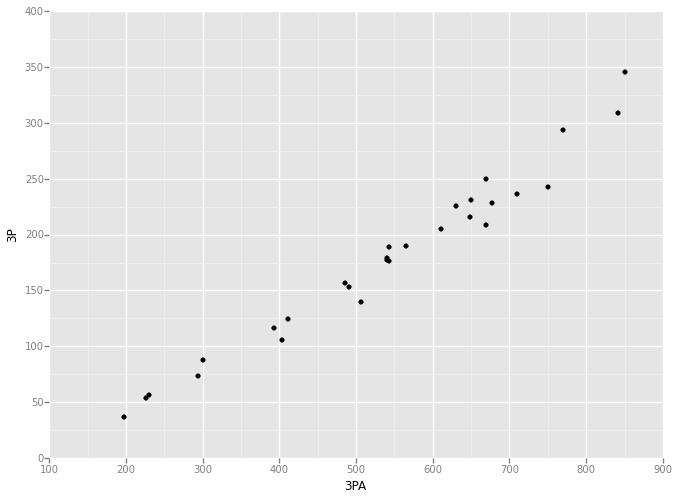

<ggplot: (-9223372036571292791)>


In [51]:
def plot_3pt(data_file):
    team_stat=pd.read_csv(data_file)
    g=gg.ggplot(gg.aes(y='3P',x='3PA'),data=team_stat)+gg.geom_point()
    print(g)
    
plot_3pt("./nba_team_data/team_stat_1990.csv")

In [52]:
# team name mapping
long_team_name_map={"New Jersey Nets":"New Jersey/Brooklyn Nets",
 "Brooklyn Nets":"New Jersey/Brooklyn Nets",
 "Charlotte Bobcats":"Charlotte Hornets/Bobcats",
 "Charlotte Hornets": "Charlotte Hornets/Bobcats",
 "Seattle SuperSonics":"Seattle SuperSonics/Oklahoma City Thunder",
 "Oklahoma City Thunder":"Seattle SuperSonics/Oklahoma City Thunder",
 "New Orleans Pelicans":"Oklahoma City Hornets/New Orleans Pelicans/New Orleans Hornets",
 "New Orleans Hornets":"Oklahoma City Hornets/New Orleans Pelicans/New Orleans Hornets",
 "Oklahoma City Hornets":"Oklahoma City Hornets/New Orleans Pelicans/New Orleans Hornets",
 "New Orleans/Oklahoma City Hornets":"Oklahoma City Hornets/New Orleans Pelicans/New Orleans Hornets",
 "Washington Wizards":"Washington Bullets/Wizards",
 "Washington Bullets":"Washington Bullets/Wizards",
 "Memphis Grizzlies":"Vancouver/Memphis Grizzlies",
 "Vancouver Grizzlies":"Vancouver/Memphis Grizzlies"};


short_team_name_map={"New Jersey Nets":"Brooklyn Nets",
 "Charlotte Bobcats":"Charlotte Hornets",
 "Seattle SuperSonics":"Oklahoma City Thunder",
 "New Orleans Hornets":"New Orleans Pelicans",
 "Oklahoma City Hornets":"New Orleans Pelicans",
 "New Orleans/Oklahoma City Hornets":"New Orleans Pelicans",
 "Washington Bullets":"Washington Wizards",
 "Vancouver Grizzlies":"Memphis Grizzlies"};

team_name_map=short_team_name_map

def map_team_name(team_name):
    if team_name in team_name_map.keys():
        return team_name_map[team_name]
    else:
        return team_name

map_team_name("New Jersey Nets")

'Brooklyn Nets'

In [53]:
def play_off_team(team_name):
    if team_name[-1]=="*":
        return "play-off team"
    else:
        return "non play-off team"

#assert play_off_team("Atlanta")==False
#assert play_off_team("Atlanta*")==True

def extract_team_name(team_name):
    if team_name[-1]=="*":
        return team_name[:-1]
    else:
        return team_name

assert extract_team_name("Atlanta*")=="Atlanta"
assert extract_team_name("Atlanta")=="Atlanta"

In [54]:
years=range(1990,2017,1)
df=[]
for y in years:
    idf=pd.read_csv("./nba_team_data/team_stat_%s.csv"%y)
    idf["year"]=y
    # calculate 3-pointer attempts per game
    idf["3PAPG"]=idf["3PA"]/idf["G"]
    # calculate 3-point shots made per game
    idf["3PPG"]=idf["3P"]/idf["G"]
    
    df.append(idf)
    
    idf["play_off"]=[play_off_team(t) for t in idf["Team"]]

    n_team=[extract_team_name(t) for t in idf["Team"]]
    idf["Team"]=n_team
    idf["year_team"]=str(y)+"-"+idf["Team"]
    idf["dummy_col"]=1
    
    n_team=[map_team_name(t) for t in idf["Team"] ]
    idf["Team"]=n_team
    
merged_df=pd.concat(df)


merged_df.to_csv("agg_team_stat.csv")
merged_df["play_off"].describe()

count               810
unique                2
top       play-off team
freq                416
Name: play_off, dtype: object

### Plot three-points per games by year

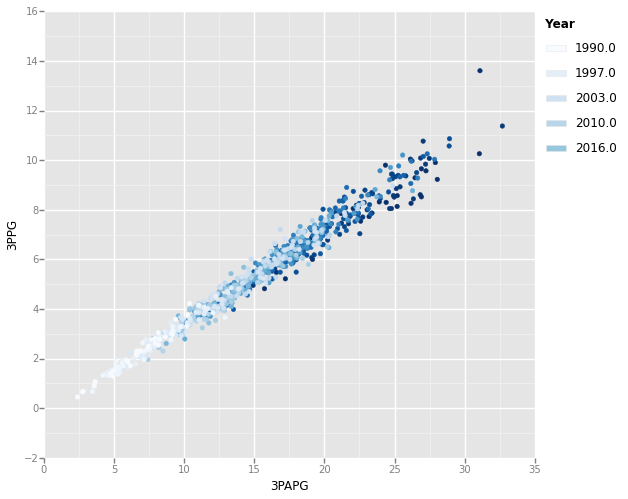

<ggplot: (283602415)>


In [55]:
g=gg.ggplot(gg.aes(y='3PPG',x='3PAPG',color="year"),data=merged_df)+gg.geom_point()
print(g)

### Group (aggregate) the dataframe by year and do summation

In [56]:
sum_df=merged_df.groupby(["year"]).sum()
sum_df['year']=sum_df.index
sum_df['3P%']=sum_df["3P"]/sum_df["3PA"]
sum_df

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,STL,BLK,TOV,PF,PTS,PTS/G,3PAPG,3PPG,dummy_col,year
year,,,,,,,,,,,,,,,,,,,,,
1990,378,2296,554566,95318,200097,13.345,5008,15149,0.330583,90310,...,19580,11622,36872,53385,245655,2995.7,184.743902,61.073171,28,1990
1991,378,2296,555084,94942,200209,13.290,5242,16398,0.319673,89700,...,19718,12055,36830,53204,244087,2976.4,199.975610,63.926829,28,1991
1992,378,2296,555136,94755,200554,13.227,5794,17524,0.330632,88961,...,19840,12668,35705,51050,241790,2948.8,213.707317,70.658537,28,1992
1993,378,2296,554981,93391,197343,13.254,6915,20558,0.336365,86476,...,19633,11986,36535,53168,241705,2947.5,250.707317,84.329268,28,1993
1994,378,2296,553581,90289,193875,13.042,7571,22718,0.333260,82717,...,20380,12008,36736,50893,233061,2842.3,277.048780,92.329268,28,1994
1995,378,2296,555447,87220,187105,13.056,12603,35144,0.358610,74617,...,19009,11853,36611,53885,232833,2839.3,428.585366,153.695122,28,1995
1996,435,2460,594383,91134,197250,13.867,14483,39477,0.366872,76651,...,19606,12453,38939,56696,244778,2985.0,481.426829,176.621951,30,1996
1997,435,2460,595003,88735,195097,13.651,14879,41320,0.360092,73856,...,20158,12077,38537,54416,238379,2907.1,503.902439,181.451220,30,1997
1998,435,2460,594952,88327,196073,13.522,10810,31273,0.345666,77517,...,20631,12478,38093,55115,235106,2867.3,381.378049,131.829268,30,1998


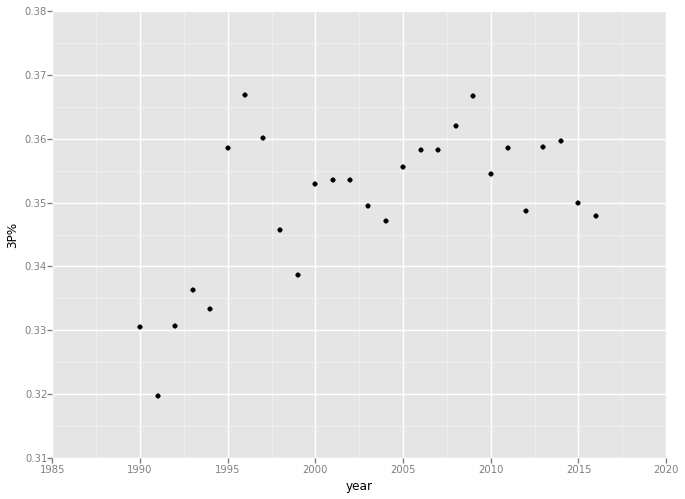

<ggplot: (-9223372036571103344)>


In [57]:
g=gg.ggplot(gg.aes(y='3P%',x='year'),data=sum_df)+gg.geom_point()
print(g)

### Group (aggregate) the dataframe by year and do averaging

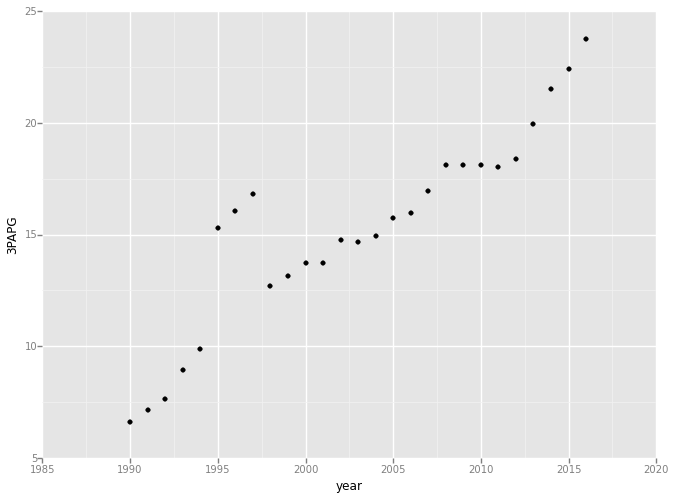

<ggplot: (285621908)>


In [58]:
mean_df=merged_df.groupby(["year"]).mean()
mean_df['year']=mean_df.index
g=gg.ggplot(gg.aes(y='3PAPG',x='year'),data=mean_df)+gg.geom_point()
print(g)

In [59]:
color_code_df=pd.read_csv("NBA_Team_color_codes.csv")

In [60]:
color_code_df=color_code_df[["Team","color1","color2"]]
new_team_name=[map_team_name(t) for t in color_code_df["Team"]]
color_code_df["Team"]=new_team_name
color_code_df

,Team,color1,color2
0,Atlanta Hawks,#E03A3E,#C3D600
1,Boston Celtics,#008348,#000000
2,Brooklyn Nets,#000000,#FFFFFF
3,Charlotte Hornets,#008CA8,#1D1160
4,Chicago Bulls,#CE1141,#000000
5,Cleveland Cavaliers,#860038,#FDBB30
6,Dallas Mavericks,#007DC5,#C4CED3
7,Denver Nuggets,#FFB20F,#4FA8FF
8,Detroit Pistons,#ED174C,#006BB6
9,Golden State Warriors,#FDB927,#006BB6


In [63]:
team_code_dict={}
for i in range(color_code_df.shape[0]):
    team_code_dict.update({color_code_df.iloc[i,0]:{"color1":color_code_df.iloc[i,1],"color2":color_code_df.iloc[i,2]}})

import json
json.dumps(team_code_dict)

'{"Denver Nuggets": {"color2": "#4FA8FF", "color1": "#FFB20F"}, "Portland Trailblazers": {"color2": "#B6BFBF", "color1": "#F0163A"}, "Indiana Pacers": {"color2": "#FFC633", "color1": "#00275D"}, "New Orleans Pelicans": {"color2": "#B4975A", "color1": "#002B5C"}, "Los Angeles Clippers": {"color2": "#006BB6", "color1": "#ED174C"}, "Charlotte Hornets": {"color2": "#1D1160", "color1": "#008CA8"}, "Utah Jazz": {"color2": "#002B5C", "color1": "#00471B"}, "Miami Heat": {"color2": "#F9A01B", "color1": "#98002E"}, "Milwaukee Bucks": {"color2": "#EEE1C6", "color1": "#00471B"}, "Phoenix Suns": {"color2": "#1D1160", "color1": "#E56020"}, "Golden State Warriors": {"color2": "#006BB6", "color1": "#FDB927"}, "Cleveland Cavaliers": {"color2": "#FDBB30", "color1": "#860038"}, "Houston Rockets": {"color2": "#C4CED3", "color1": "#CE1141"}, "Washington Wizards": {"color2": "#F5002F", "color1": "#002566"}, "New York Knicks": {"color2": "#F58426", "color1": "#006BB6"}, "Minnesota Timberwolves": {"color2": "